## 0. Simulate dataset

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
np.random.seed(42)
sample_size = 1000
X =  np.random.rand(sample_size,2)
noice = np.random.randn(sample_size,1)
y = 3*X[:, [0]] + 5*X[:, [1]] + 3 + noice

X = np.c_[np.ones(sample_size), X]

## 1. Gradient descent - learning rate

a)

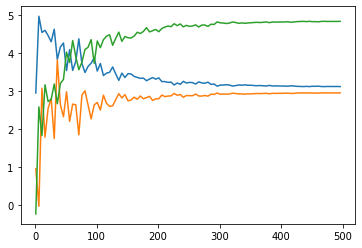

In [191]:
def gradient_decent(X, y, learning_rate = 0.1, epochs = 100):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for _ in range(epochs):
        gradient = 2/m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient
    
    return theta

epochs = range(1, 500, 5)
thetas = np.array([gradient_decent(X, y, epochs = epoch).reshape(-1) for epoch in epochs])
plt.plot(epochs, thetas)

In [192]:
thetas[-1]

array([3.11974106, 2.95472426, 4.83395309])

b)

In [193]:
epochs_2 = range(1, 5000, 20)
thetas_2 = np.array([gradient_decent(X, y, learning_rate = 0.01, epochs = epoch).reshape(-1) for epoch in epochs_2])

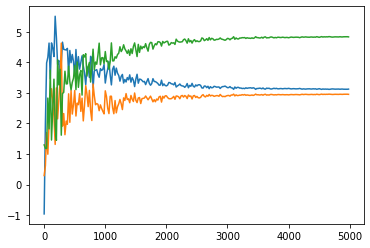

In [194]:
plt.plot(epochs_2, thetas_2)

In [195]:
thetas[-1]

array([3.11974106, 2.95472426, 4.83395309])

c)

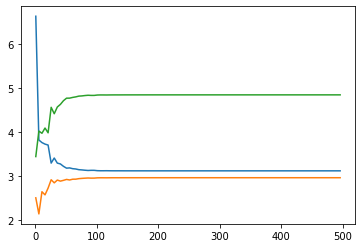

In [196]:
thetas_3 = np.array([gradient_decent(X, y, learning_rate=0.5, epochs = epoch).reshape(-1) for epoch in epochs])
plt.plot(epochs, thetas_3)

It seems like it got stuck on a local minimum when using 0.5 learning rate.

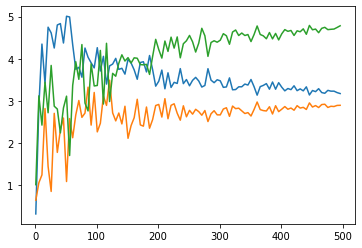

In [319]:
thetas_4 = np.array([gradient_decent(X, y, learning_rate=0.05, epochs = epoch).reshape(-1) for epoch in epochs])
plt.plot(epochs, thetas_4)

## 2. Stochastic Gradient Descent - learning rate

In [198]:
def learning_rate_schedule(t, t0, t1):
    return t0 / (t + t1)

def stochastic_gradient_decent(X, y, epochs, t0, t1):
    theta = np.random.randn(3,1)
    m = len(X)

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            x_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            
            gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
            eta = learning_rate_schedule(epoch * m * i, t0, t1)
            
            theta -= eta * gradients
            
    return theta.reshape(-1)


Gradient decent ended up at [3.11605263, 2.9577691 , 4.83787608], now testing different different values for Stochastic gradient decent

Increasing epochs

In [199]:
sgd_1 = stochastic_gradient_decent(X, y, 10, 5, 50)
sgd_1

array([3.35623114, 2.73360777, 5.03396512])

In [200]:
sgd_2 = stochastic_gradient_decent(X, y, 25, 5, 50)
sgd_2

array([2.60953765, 2.96463354, 3.99141845])

In [201]:
sgd_3 = stochastic_gradient_decent(X, y, 100, 5, 50)
sgd_3

array([3.00966973, 3.1441297 , 4.95824658])

increasing t1

In [202]:
sgd_4 = stochastic_gradient_decent(X, y, 10, 5, 100)
sgd_4

array([3.61978165, 3.37900041, 4.89474304])

In [220]:
sgd_5 = stochastic_gradient_decent(X, y, 10, 5, 250)
sgd_5

array([3.47388755, 2.84117557, 4.58399738])

decreasing t0

In [230]:
sgd_6 = stochastic_gradient_decent(X, y, 10, 3, 50)
sgd_6

array([3.07852474, 3.26611191, 5.28474366])

In [316]:
sgd_7 = stochastic_gradient_decent(X, y, 10, 1, 50)
sgd_7

array([3.25589859, 2.90430236, 4.8219583 ])